/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


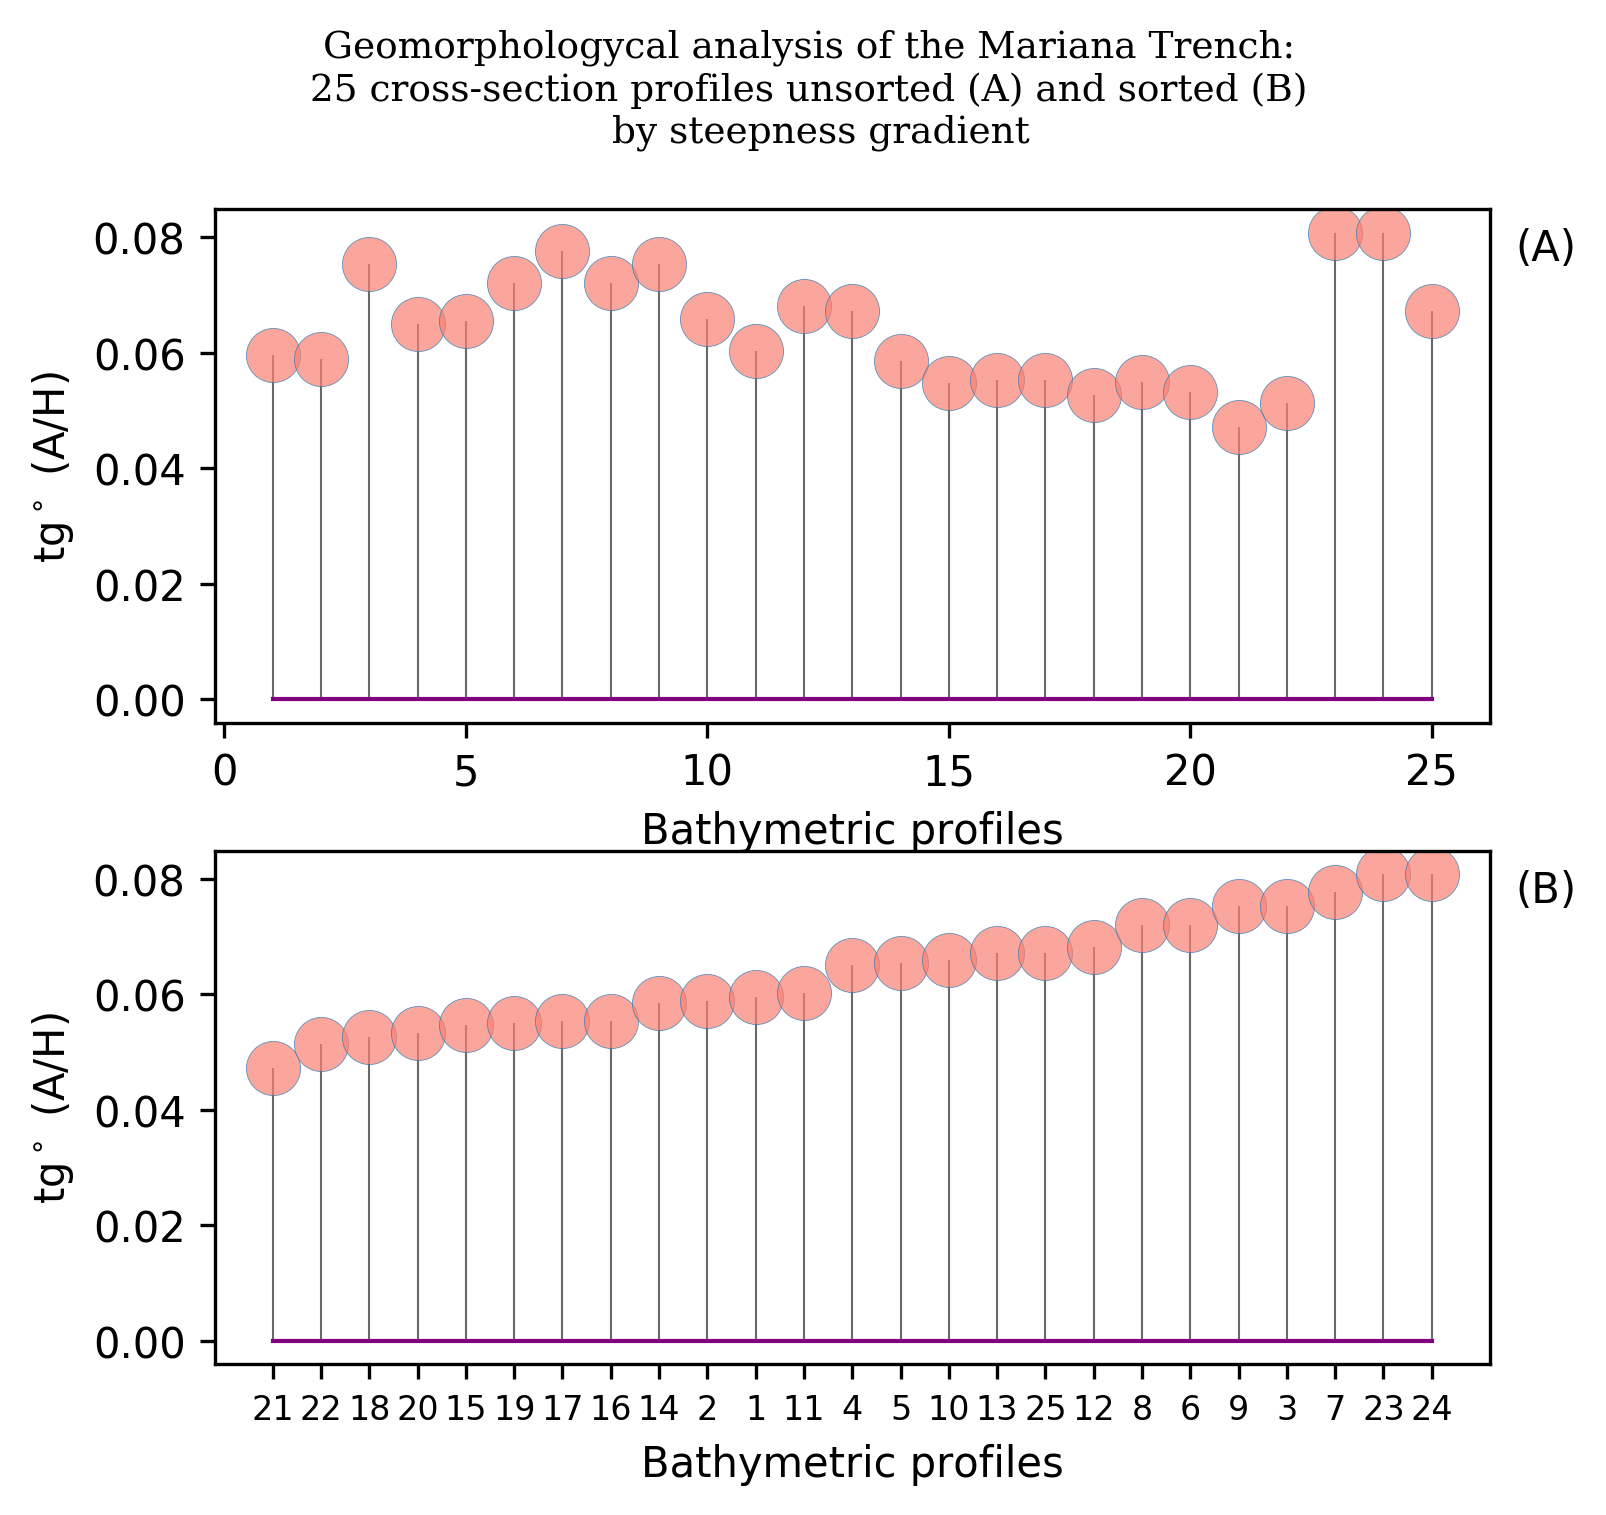

In [14]:
#!/usr/bin/env python
# coding: utf-8
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt

os.chdir('/Users/pauline/Documents/Python')
df = pd.read_csv("Tab-Morph.csv")

# define figure
fig = plt.figure(figsize=(5.0, 5.0), dpi=300)
fig.suptitle('Geomorphologycal analysis of the Mariana Trench: \n25 cross-section profiles unsorted (A) and sorted (B) \n by steepness gradient', 
             fontsize=9, fontfamily='serif', fontweight='normal', x=0.5, y=0.97
            )
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# subplot 1
plt.subplot(2, 1, 1)
x = df.profile
values = df.tg_angle
markerline, stemlines, baseline = plt.stem(x, values, markerfmt="o", 
                                           basefmt='-', use_line_collection=True)
plt.setp(markerline, mfc='salmon', markersize=13, alpha=0.7, markeredgewidth=.2) 
plt.setp(stemlines, linewidth=.5, color='dimgray') 
plt.setp(baseline, color='purple', linewidth=1)
plt.xlabel('Bathymetric profiles', fontsize=10, fontfamily='sans-serif')
plt.ylabel('tg$^\circ$ (A/H)', fontsize=10, fontfamily='sans-serif')
ax1.annotate('(A)', xy=(1.02, .90), xycoords="axes fraction")

# subplot 2
plt.subplot(2, 1, 2)
df = pd.DataFrame({'group':df.profile, 'values':df.tg_angle})
ordered_df = df.sort_values(by='values')
markerline, stemlines, baseline = plt.stem(x, ordered_df['values'], 
                                           markerfmt="o", basefmt='-', use_line_collection=True)
plt.setp(markerline, mfc='salmon', markersize=13, alpha=0.7, markeredgewidth=.2) 
plt.xticks(x, ordered_df['group'], fontsize=8)
plt.setp(stemlines, linewidth=.5, color='dimgray') 
plt.setp(baseline, color='purple', linewidth=1)
plt.xlabel('Bathymetric profiles', fontsize=10, fontfamily='sans-serif')
plt.ylabel('tg$^\circ$ (A/H)', fontsize=10, fontfamily='sans-serif')
ax2.annotate('(B)', xy=(1.02, .90), xycoords="axes fraction")

# visualizing
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.08,
                    left=0.10, right=0.95,
                    hspace=0.25, wspace=0.35
                    )
plt.savefig('plot_Stems.png', dpi=300)
plt.show()